        price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0    13300000  7420         4          2        3      yes        no       no   
1    12250000  8960         4          4        4      yes        no       no   
2    12250000  9960         3          2        2      yes        no      yes   
3    12215000  7500         4          2        2      yes        no      yes   
4    11410000  7420         4          1        2      yes       yes      yes   
..        ...   ...       ...        ...      ...      ...       ...      ...   
540   1820000  3000         2          1        1      yes        no      yes   
541   1767150  2400         3          1        1       no        no       no   
542   1750000  3620         2          1        1      yes        no       no   
543   1750000  2910         3          1        1       no        no       no   
544   1750000  3850         3          1        2      yes        no       no   

    hotwaterheating aircond

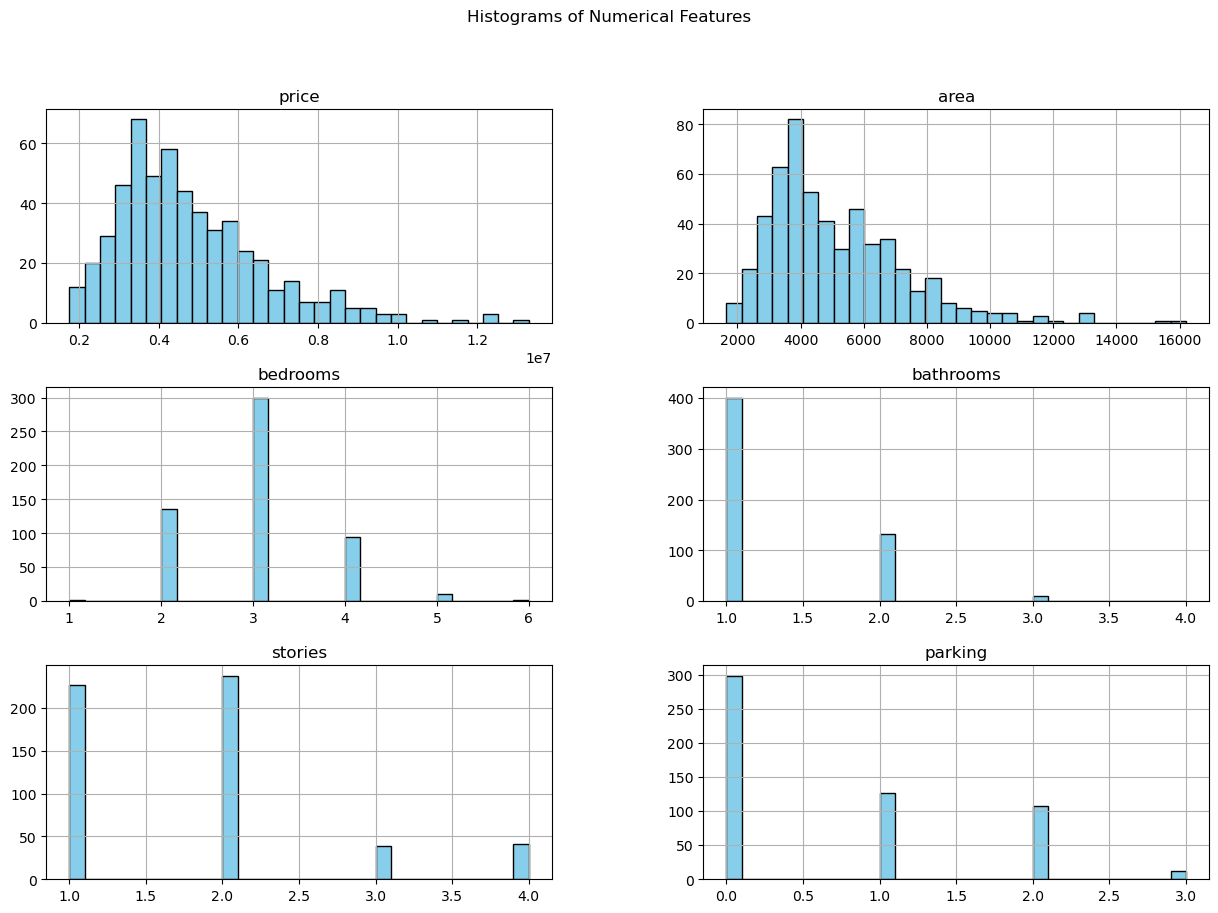

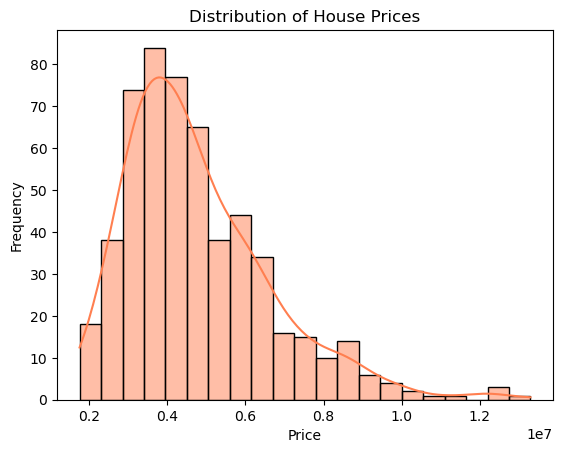

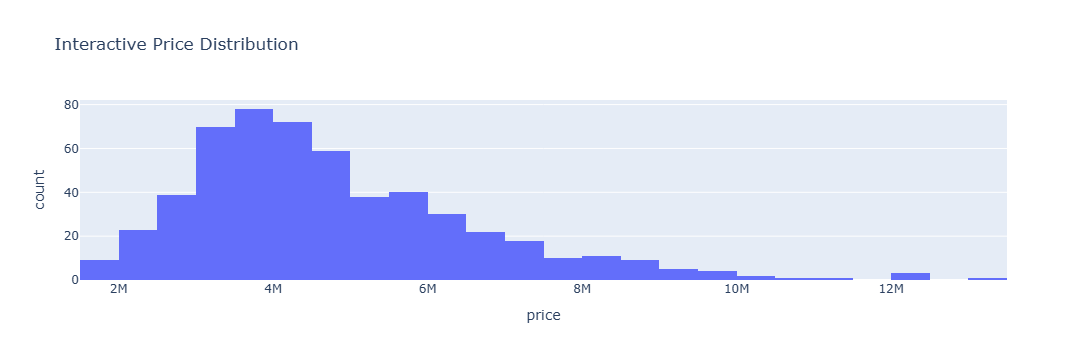

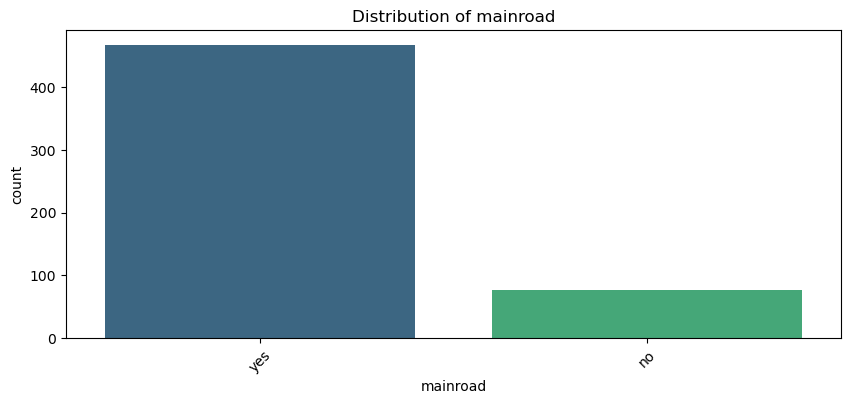

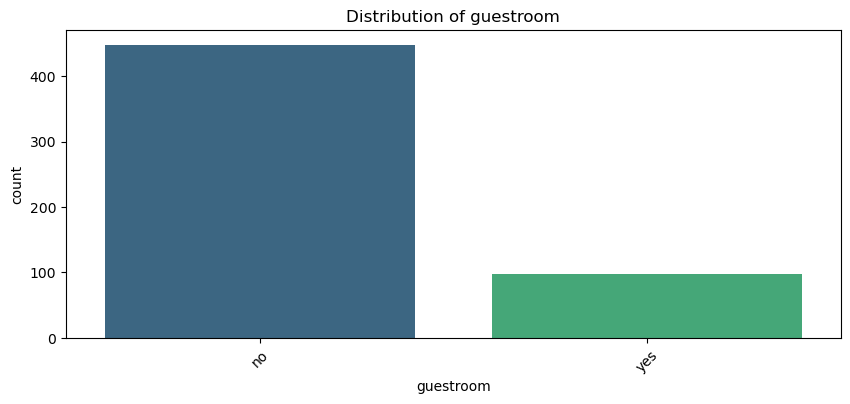

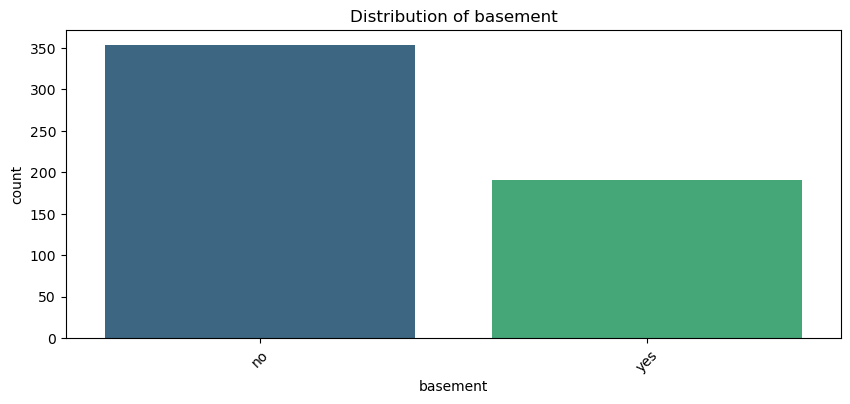

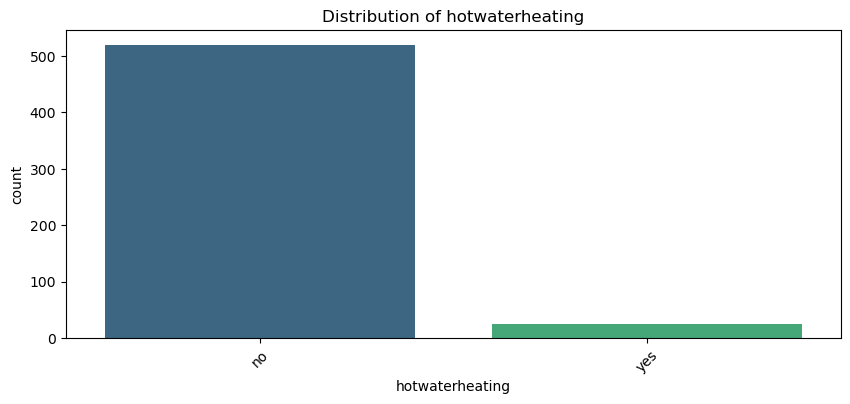

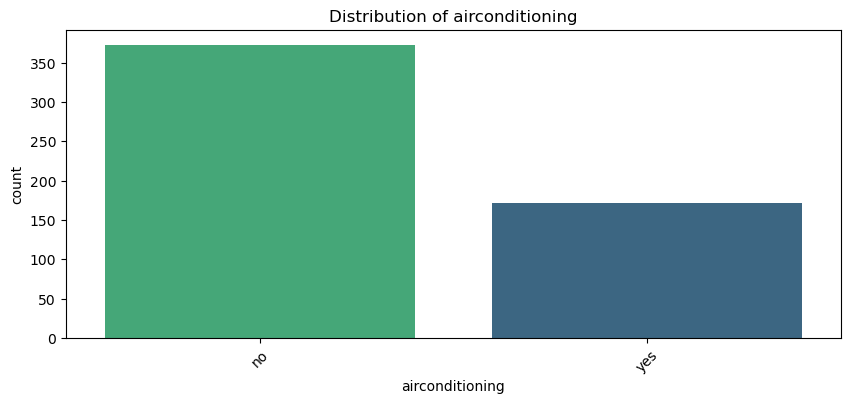

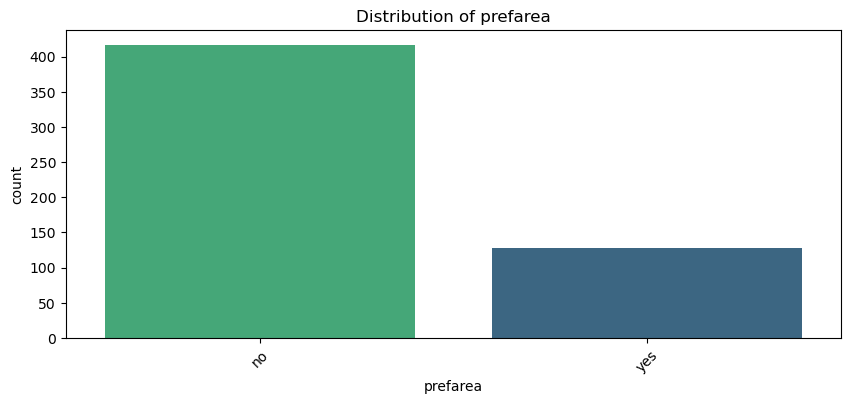

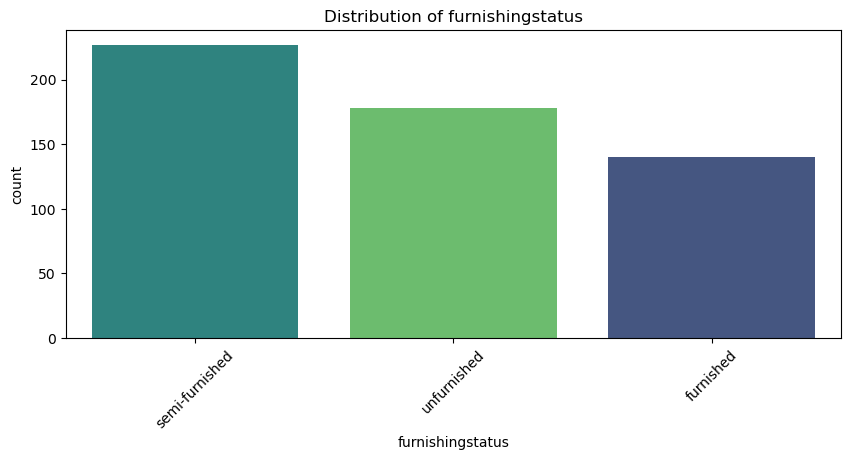

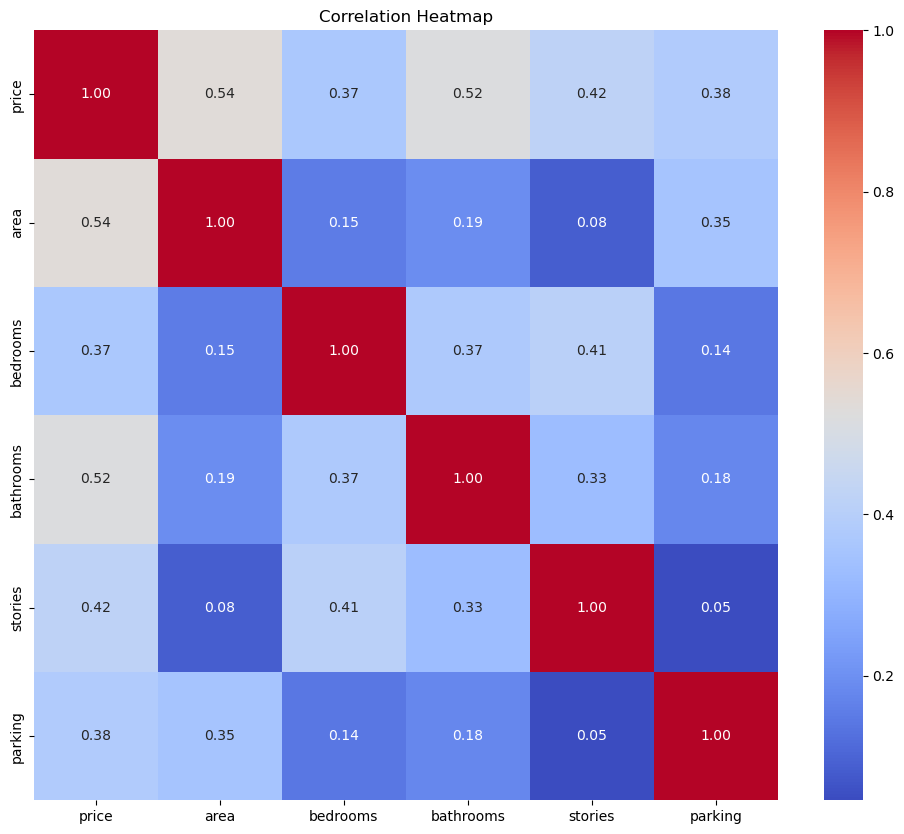

price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


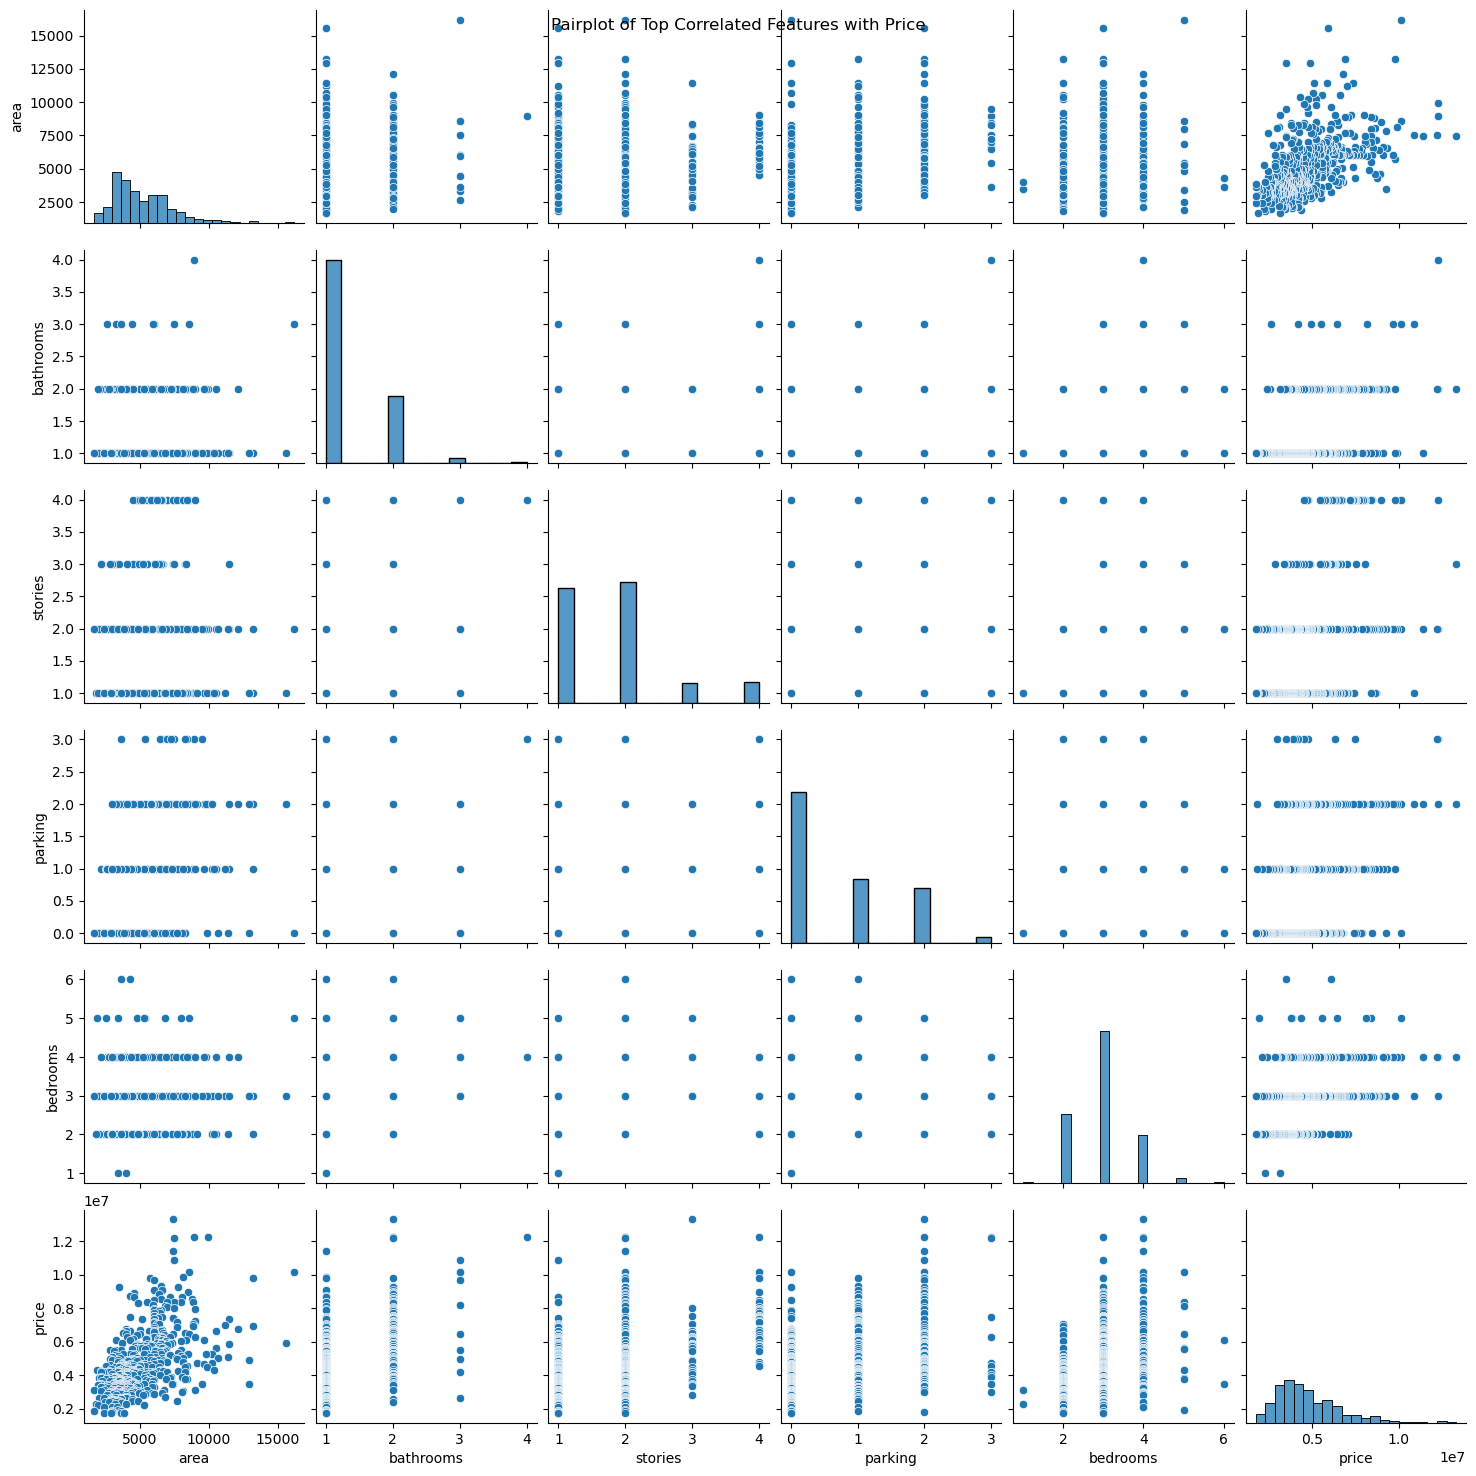

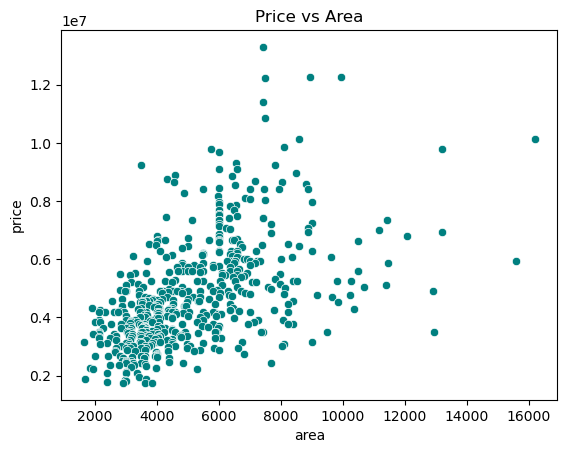

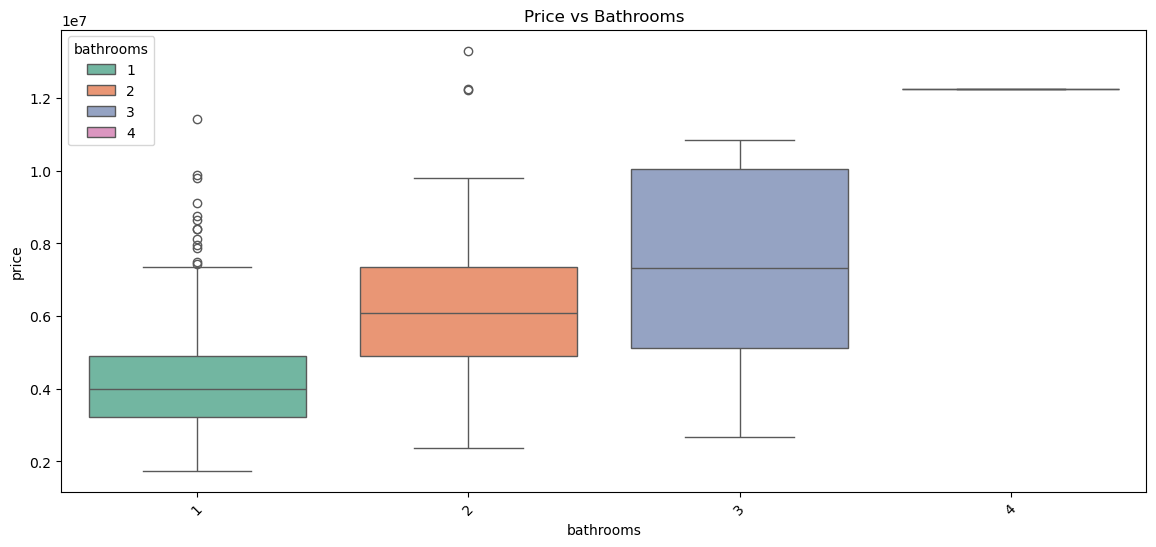

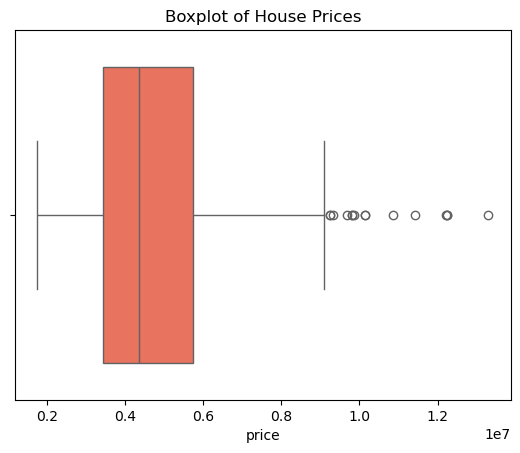

Outliers per feature:
 price         6
area          7
bedrooms      2
bathrooms    11
stories       0
parking       0
dtype: int64


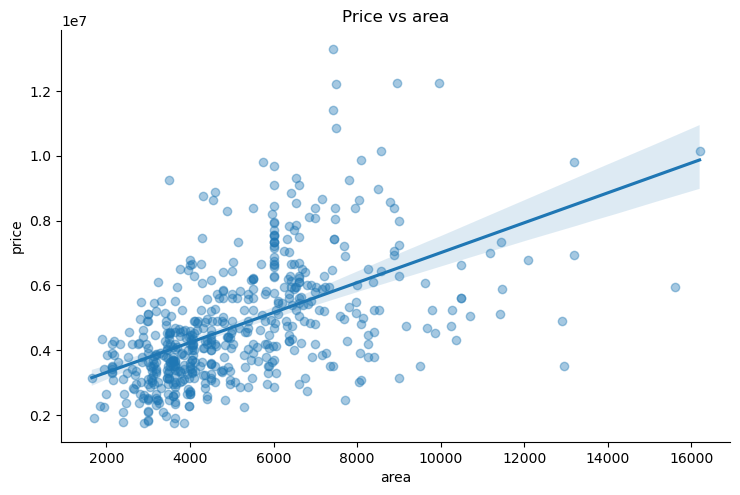

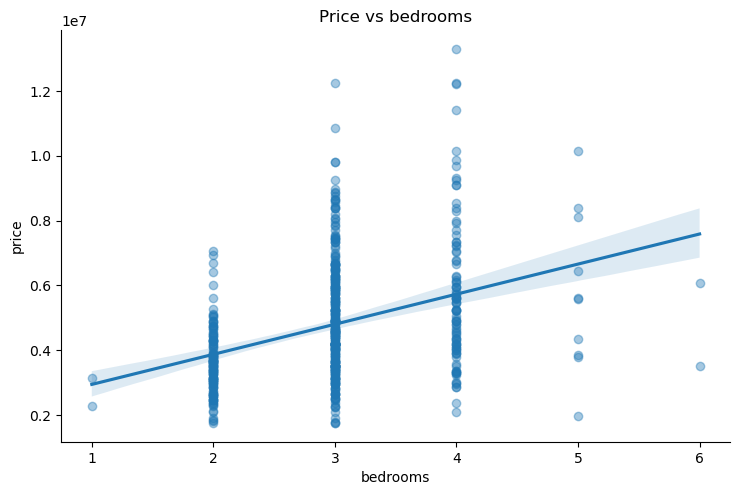

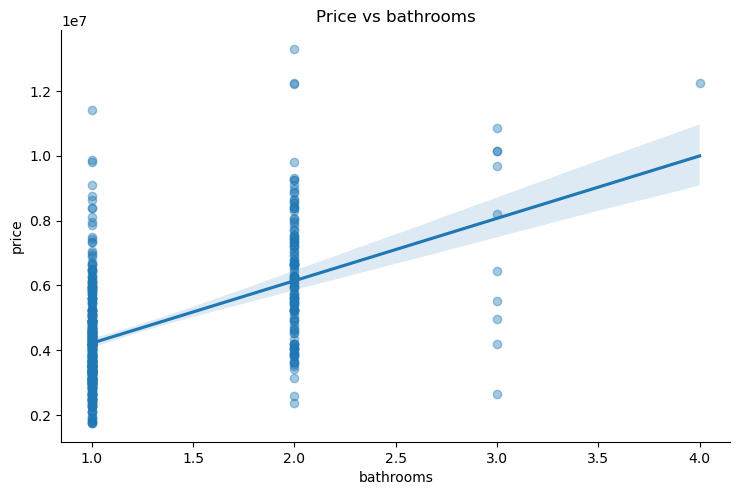

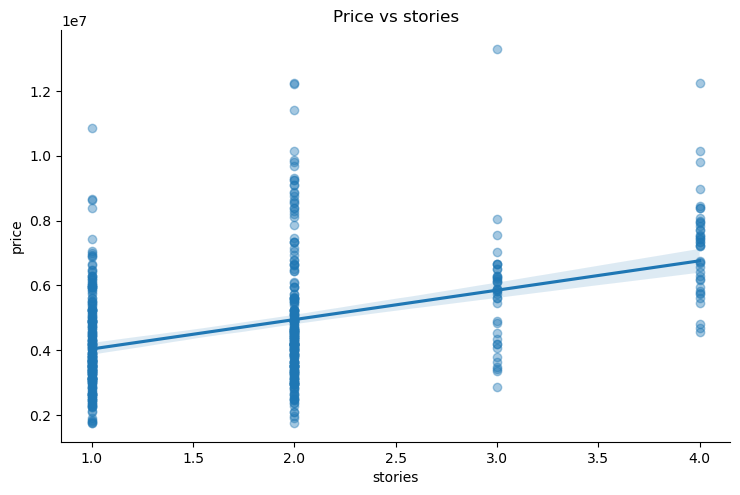

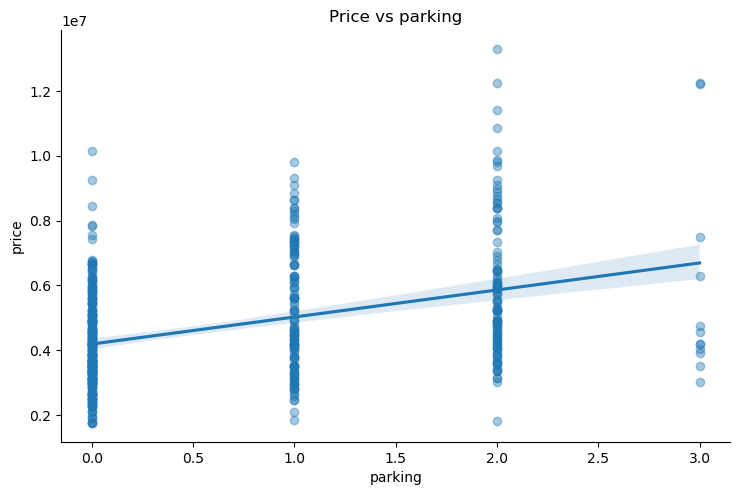

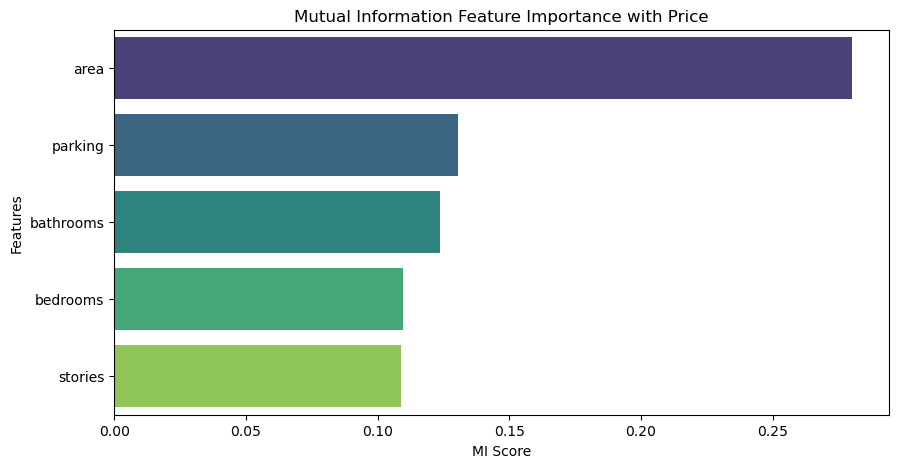

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("C:/Users/user/Downloads/kaggle/Housing.csv")
print(df)
df.info()

df.describe().T

#Checking missing values
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing, 'Percentage': missing_percent})
missing_df[missing_df['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)

numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

df[numeric_features].hist(bins=30, figsize=(15, 10), color='skyblue', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Skewness and Kurtosis check
skew_kurt = pd.DataFrame({
    "Skewness": df[numeric_features].skew(),
    "Kurtosis": df[numeric_features].kurt()
})
skew_kurt

import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Replace inf with NaN to avoid deprecation issues
df.replace([np.inf, -np.inf], np.nan, inplace=True)


# Seaborn histogram
sns.histplot(df['price'], kde=True, color='coral')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Plotly interactive histogram
fig = px.histogram(df, x='price', nbins=50, title='Interactive Price Distribution')
fig.show()


categorical_features = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(
    x=col,
    data=df,
    order=df[col].value_counts().index,
    hue=col,
    palette='viridis'
)

    plt.xticks(rotation=45)
    plt.title(f'Distribution of {col}')
    plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlations on numeric columns only
corr = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

import warnings
warnings.filterwarnings('ignore')

cor_target = corr['price'].sort_values(ascending=False)
print(cor_target)

# Plot top correlated features with Price
top_features = cor_target.index[1:6]
sns.pairplot(df, vars=top_features.tolist() + ['price'])
plt.suptitle('Pairplot of Top Correlated Features with Price')
plt.show()

if 'area' in df.columns:
    sns.scatterplot(x='area', y='price', data=df, color='teal')
    plt.title('Price vs Area')
    plt.show()


if 'bathrooms' in df.columns:
    plt.figure(figsize=(14, 6))
    sns.boxplot(
    x='bathrooms',
    y='price',
    hue='bathrooms',
    data=df,
    palette='Set2'
)
    plt.xticks(rotation=45)
    plt.title('Price vs Bathrooms')
    plt.show()

# Boxplot for outliers in Price
sns.boxplot(x=df['price'], color='tomato')
plt.title('Boxplot of House Prices')
plt.show()

# Z-score method to detect outliers (optional)
from scipy import stats

z_scores = np.abs(stats.zscore(df[numeric_features]))
outliers = (z_scores > 3).sum(axis=0)
print("Outliers per feature:\n", pd.Series(outliers, index=numeric_features))

# Using seaborn FacetGrid
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*figure layout has changed to tight.*")

for col in numeric_features:
    if col != 'price':
        sns.lmplot(x=col, y='price', data=df, aspect=1.5, scatter_kws={'alpha':0.4})
        plt.title(f'Price vs {col}')
        plt.show()

from sklearn.feature_selection import mutual_info_regression

X = df.drop('price', axis=1)._get_numeric_data().fillna(0)
y = df['price']

mi_scores = mutual_info_regression(X, y)
mi_scores_series = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(
    x=mi_scores_series.values,
    y=mi_scores_series.index,
    hue=mi_scores_series.index,
    palette='viridis'
)
plt.title('Mutual Information Feature Importance with Price')
plt.xlabel('MI Score')
plt.ylabel('Features')
plt.show()


